In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression,Lasso,Ridge
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings("ignore")

In [53]:
# Load the three CSV files and rename it
account = pd.read_csv('account.csv') 
concerts_2014_15 = pd.read_csv('concerts_2014-15.csv') 
concerts = pd.read_csv('concerts.csv') 
subscriptions = pd.read_csv('subscriptions.csv') 
tickets_all = pd.read_csv('tickets_all.csv') 
zipcodes = pd.read_csv('zipcodes.csv') 

train = pd.read_csv('train.csv') 
test = pd.read_csv('test.csv') 

In [54]:

print(concerts_2014_15)

      season                             concert.name  set  \
0  2014-2015   Steven Isserlis, Boccherini, and Haydn    1   
1  2014-2015    Andreas Scholl, J.S. Bach, and Handel    2   
2  2014-2015  Vivaldi and Zelenka: A Joyous Christmas    3   
3  2014-2015                         The Cousins Bach    4   
4  2014-2015                Rachel Podger and Vivaldi    5   
5  2014-2015          RossiniÕs The Marriage Contract    6   

                                                 who  \
0  Nicholas McGegan, conductor, Steven Isserlis, ...   
1  Julian Wachner, conductor, Andreas Scholl, cou...   
2  Nicholas McGegan, conductor, Dominique Labelle...   
3  Nicholas McGegan, conductor Sherezade Panthaki...   
4                   Rachel Podger, violin and leader   
5  Nicholas McGegan, conductor Soloists from San ...   

                                                what  
0  BOCCHERINIConcerto for Violoncello No. 7 in G ...  
1  HANDELArias including ÒVa tacitoÓ from Giulio ...  
2  VIVA

In [55]:
display(train.shape)
display(train.head())

(6941, 2)

,account.id,label
0,001i000000NuRo3,0
1,001i000000NuRxd,0
2,001i000000NuQGN,0
3,001i000000NuPfL,0
4,001i000000NuQkP,0


### Deal with training data

In [56]:
# add column features: amount.donated.2013, amount.donated.lifetime, no.donations.lifetime

train1 = pd.merge(train, account, on = "account.id", how = 'left')
train_add_donate = train1.drop(columns=['shipping.zip.code', 'billing.zip.code', 'shipping.city', 'billing.city', 'relationship', 'first.donated'])
display(train_add_donate.shape)
display(train_add_donate.head())

(6941, 5)

,account.id,label,amount.donated.2013,amount.donated.lifetime,no.donations.lifetime
0,001i000000NuRo3,0,0.0,0.0,0
1,001i000000NuRxd,0,0.0,0.0,0
2,001i000000NuQGN,0,0.0,0.0,0
3,001i000000NuPfL,0,0.0,0.0,0
4,001i000000NuQkP,0,0.0,0.0,0


In [57]:
# add coluimn features: if they brought a subscription in 2013-2014


subscription_2013_2014 = subscriptions[subscriptions['season'] == '2013-2014']
# display(subscription_2013_2014.shape)
# display(subscription_2013_2014.head())
# print(len(subscription_2013_2014['account.id'].unique()))
all_train_account_list = train_add_donate['account.id'].tolist()
account_20132014_list = subscription_2013_2014['account.id'].tolist()

if_subscribe_20132014 = []
for i in all_train_account_list:
    if i in account_20132014_list:
        if_subscribe_20132014.append(1)
    else:
        if_subscribe_20132014.append(0)
#print(if_subscribe_20132014)
train_add_donate['if_subscribe_20132014'] = if_subscribe_20132014
display(train_add_donate.shape)
display(train_add_donate.head())

(6941, 6)

,account.id,label,amount.donated.2013,amount.donated.lifetime,no.donations.lifetime,if_subscribe_20132014
0,001i000000NuRo3,0,0.0,0.0,0,0
1,001i000000NuRxd,0,0.0,0.0,0,0
2,001i000000NuQGN,0,0.0,0.0,0,0
3,001i000000NuPfL,0,0.0,0.0,0,0
4,001i000000NuQkP,0,0.0,0.0,0,0


In [58]:
# add coluimn features: if they brought a CYO

subscription_CYO = subscriptions[subscriptions['package'] == 'CYO']
# display(subscription_CYO.shape)
# display(subscription_CYO.head())
# print(len(subscription_CYO['account.id'].unique()))

account_CYO_list = subscription_CYO['account.id'].tolist()
if_subscribe_CYO = []
for i in all_train_account_list:
    if i in account_CYO_list:
        if_subscribe_CYO.append(1)
    else:
        if_subscribe_CYO.append(0)
train_add_donate['if_subscribe_CYO'] = if_subscribe_CYO

In [59]:
# add coluimn features: if they brought a full

subscription_full = subscriptions[subscriptions['package'] == 'Full']
account_full_list = subscription_full['account.id'].tolist()
if_subscribe_full = []
for i in all_train_account_list:
    if i in account_full_list:
        if_subscribe_full.append(1)
    else:
        if_subscribe_full.append(0)
train_add_donate['if_subscribe_full'] = if_subscribe_full

In [60]:
# add coluimn features: if they brought a full upgrade

subscription_full_upgrade = subscriptions[subscriptions['package'] == 'Full upgrade']
account_full_upgrade_list = subscription_full_upgrade['account.id'].tolist()
if_subscribe_full_upgrade = []
for i in all_train_account_list:
    if i in account_full_upgrade_list:
        if_subscribe_full_upgrade.append(1)
    else:
        if_subscribe_full_upgrade.append(0)
train_add_donate['if_subscribe_full_upgrade'] = if_subscribe_full_upgrade
display(train_add_donate.shape)
display(train_add_donate.head())

(6941, 9)

,account.id,label,amount.donated.2013,amount.donated.lifetime,no.donations.lifetime,if_subscribe_20132014,if_subscribe_CYO,if_subscribe_full,if_subscribe_full_upgrade
0,001i000000NuRo3,0,0.0,0.0,0,0,0,0,0
1,001i000000NuRxd,0,0.0,0.0,0,0,0,0,0
2,001i000000NuQGN,0,0.0,0.0,0,0,0,0,0
3,001i000000NuPfL,0,0.0,0.0,0,0,0,1,0
4,001i000000NuQkP,0,0.0,0.0,0,0,0,0,0


In [61]:
# add coluimn features: if they brought a quartet

subscription_quartet = subscriptions[subscriptions['package'].isin(['Quartet', 'Quartet A', 'Quartet B', 'Quartet CC'])]
account_quartet_list = subscription_quartet['account.id'].tolist()

if_subscribe_quartet = []
for i in all_train_account_list:
    if i in account_quartet_list:
        if_subscribe_quartet.append(1)
    else:
        if_subscribe_quartet.append(0)
train_add_donate['if_subscribe_quartet'] = if_subscribe_quartet

In [62]:
# add coluimn features: if they brought a trio

subscription_trio = subscriptions[subscriptions['package'].isin(['Trio', 'Trio A', 'Trio B'])]
account_trio_list = subscription_trio['account.id'].tolist()

if_subscribe_trio = []
for i in all_train_account_list:
    if i in account_trio_list:
        if_subscribe_trio.append(1)
    else:
        if_subscribe_trio.append(0)
train_add_donate['if_subscribe_trio'] = if_subscribe_trio
display(train_add_donate.shape)
display(train_add_donate.head())

(6941, 11)

,account.id,label,amount.donated.2013,amount.donated.lifetime,no.donations.lifetime,if_subscribe_20132014,if_subscribe_CYO,if_subscribe_full,if_subscribe_full_upgrade,if_subscribe_quartet,if_subscribe_trio
0,001i000000NuRo3,0,0.0,0.0,0,0,0,0,0,0,0
1,001i000000NuRxd,0,0.0,0.0,0,0,0,0,0,0,0
2,001i000000NuQGN,0,0.0,0.0,0,0,0,0,0,0,0
3,001i000000NuPfL,0,0.0,0.0,0,0,0,1,0,0,0
4,001i000000NuQkP,0,0.0,0.0,0,0,0,0,0,0,0


In [63]:
# add coluimn features: if buy tickets in 2013-2014 season
tickets_all_2013_2014 = tickets_all[tickets_all['season'] == '2013-2014']

all_train_account_list = train_add_donate['account.id'].tolist()
buytickets_20132014_list = tickets_all_2013_2014['account.id'].tolist()

if_buytickets_20132014 = []
for i in all_train_account_list:
    if i in buytickets_20132014_list:
        if_buytickets_20132014.append(1)
    else:
        if_buytickets_20132014.append(0)

train_add_donate['if_buytickets_20132014'] = if_buytickets_20132014
display(train_add_donate.shape)
display(train_add_donate.head())

(6941, 12)

,account.id,label,amount.donated.2013,amount.donated.lifetime,no.donations.lifetime,if_subscribe_20132014,if_subscribe_CYO,if_subscribe_full,if_subscribe_full_upgrade,if_subscribe_quartet,if_subscribe_trio,if_buytickets_20132014
0,001i000000NuRo3,0,0.0,0.0,0,0,0,0,0,0,0,0
1,001i000000NuRxd,0,0.0,0.0,0,0,0,0,0,0,0,0
2,001i000000NuQGN,0,0.0,0.0,0,0,0,0,0,0,0,0
3,001i000000NuPfL,0,0.0,0.0,0,0,0,1,0,0,0,0
4,001i000000NuQkP,0,0.0,0.0,0,0,0,0,0,0,0,0


In [64]:
# add coluimn features: if they like conductor

concert_split = concerts['who'].str.split(',', expand=True)
concerts[['name']] = concert_split[0]
display(concerts)
display(concerts.groupby(["name", "season"])["set"].count())
display(concerts.groupby(["season"])["name"].count())

# get conclusion that 2010-2011, 2012-2013

,season,concert.name,set,who,what,location,name
0,2010-2011,Robert Levin Plays Mozart,1,"Nicholas McGegan, conductor\rRobert Levin, for...","MOZART: Incidental Music from Thamos, King of ...",Peninsula,Nicholas McGegan
1,2010-2011,Robert Levin Plays Mozart,1,"Nicholas McGegan, conductor\rRobert Levin, for...","MOZART: Incidental Music from Thamos, King of ...",Berkeley Sunday,Nicholas McGegan
2,2010-2011,Robert Levin Plays Mozart,1,"Nicholas McGegan, conductor\rRobert Levin, for...","MOZART: Incidental Music from Thamos, King of ...",San Francisco,Nicholas McGegan
3,2010-2011,Robert Levin Plays Mozart,1,"Nicholas McGegan, conductor\rRobert Levin, for...","MOZART: Incidental Music from Thamos, King of ...",Berkeley Saturday,Nicholas McGegan
4,2010-2011,Robert Levin Plays Mozart,1,"Nicholas McGegan, conductor\rRobert Levin, for...","MOZART: Incidental Music from Thamos, King of ...",Contra Costa,Nicholas McGegan
...,...,...,...,...,...,...,...
98,2013-2014,Music from the Heart of Europe,5,"Elizabeth Blumenstock, violin and leader\rPhil...",GEORG MUFFAT\rFasciculus I ÒNobilis JuventusÓ ...,Berkeley Saturday,Elizabeth Blumenstock
99,2013-2014,Music from the Heart of Europe,5,"Elizabeth Blumenstock, violin and leader\rPhil...",GEORG MUFFAT\rFasciculus I ÒNobilis JuventusÓ ...,Berkeley Sunday,Elizabeth Blumenstock
100,2013-2014,Vivaldi's Venice,6,"Nicholas McGegan, conductor\rCcile van de San...",VIVALDI\rJuditha triumphans devicta Holofernis...,Berkeley Sunday,Nicholas McGegan
101,2013-2014,Vivaldi's Venice,6,"Nicholas McGegan, conductor\rCcile van de San...",VIVALDI\rJuditha triumphans devicta Holofernis...,San Francisco,Nicholas McGegan


name                   season   
Elizabeth Blumenstock  2013-2014     3
Lars Ulrik Mortensen   2010-2011     4
Masaaki Suzuki         2012-2013     4
Nicholas McGegan       2010-2011    28
                       2011-2012    17
                       2012-2013    15
                       2013-2014    13
Ottavio Dantone        2011-2012     6
Rachel Podger          2012-2013     4
Richard Egarr          2011-2012     5
Steven Fox             2013-2014     4
Name: set, dtype: int64

season
2010-2011    32
2011-2012    28
2012-2013    23
2013-2014    20
Name: name, dtype: int64

In [67]:
# add coluimn features: if they subscribe in 2010-2011, 2012-2013
subscription_2010_2011 = subscriptions[subscriptions['season'] == '2010-2011']

all_train_account_list = train_add_donate['account.id'].tolist()
account_20102011_list = subscription_2010_2011['account.id'].tolist()

if_subscribe_20102011 = []
for i in all_train_account_list:
    if i in account_20102011_list:
        if_subscribe_20102011.append(1)
    else:
        if_subscribe_20102011.append(0)
#print(if_subscribe_20132014)
train_add_donate['if_subscribe_20102011'] = if_subscribe_20102011

subscription_2012_2013 = subscriptions[subscriptions['season'] == '2012-2013']

all_train_account_list = train_add_donate['account.id'].tolist()
account_20122013_list = subscription_2012_2013['account.id'].tolist()

if_subscribe_20122013 = []
for i in all_train_account_list:
    if i in account_20122013_list:
        if_subscribe_20122013.append(1)
    else:
        if_subscribe_20122013.append(0)
#print(if_subscribe_20132014)
train_add_donate['if_subscribe_20122013'] = if_subscribe_20122013



In [66]:
# add coluimn features: average subscriptions in the past

subscription_average = subscriptions.groupby(subscriptions['account.id'])['account.id'].count().reset_index(name='counts')

                                             
train_final = pd.merge(train_add_donate, subscription_average, on = "account.id", how = 'left')

train_final = train_final.fillna(0)

display(train_final.shape)
display(train_final.head())

(6941, 15)

,account.id,label,amount.donated.2013,amount.donated.lifetime,no.donations.lifetime,if_subscribe_20132014,if_subscribe_CYO,if_subscribe_full,if_subscribe_full_upgrade,if_subscribe_quartet,if_subscribe_trio,if_buytickets_20132014,if_subscribe_20102011,if_subscribe_20122013,counts
0,001i000000NuRo3,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0
1,001i000000NuRxd,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0
2,001i000000NuQGN,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0
3,001i000000NuPfL,0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,1.0
4,001i000000NuQkP,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0


### Deal with test data

In [68]:
display(test.shape)
display(test.head())

(2975, 1)

,ID
0,001i000000NuQ6Y
1,001i000000NuQXz
2,001i000000NuRDC
3,001i000000NuQeg
4,001i000000NuOQc


In [69]:
test1 = pd.merge(test, account, left_on = "ID", right_on = "account.id", how = 'left')
test_add_donate = test1.drop(columns=['ID', 'shipping.zip.code', 'billing.zip.code', 'shipping.city', 'billing.city', 'relationship', 'first.donated'])

subscription_2013_2014 = subscriptions[subscriptions['season'] == '2013-2014']
all_test_account_list = test_add_donate['account.id'].tolist()
account_20132014_list = subscription_2013_2014['account.id'].tolist()

if_subscribe_20132014 = []
for i in all_test_account_list:
    if i in account_20132014_list:
        if_subscribe_20132014.append(1)
    else:
        if_subscribe_20132014.append(0)
#print(if_subscribe_20132014)
test_add_donate['if_subscribe_20132014'] = if_subscribe_20132014

subscription_CYO = subscriptions[subscriptions['package'] == 'CYO']
account_CYO_list = subscription_CYO['account.id'].tolist()
if_subscribe_CYO = []
for i in all_test_account_list:
    if i in account_CYO_list:
        if_subscribe_CYO.append(1)
    else:
        if_subscribe_CYO.append(0)
test_add_donate['if_subscribe_CYO'] = if_subscribe_CYO

subscription_full = subscriptions[subscriptions['package'] == 'Full']
account_full_list = subscription_full['account.id'].tolist()
if_subscribe_full = []
for i in all_test_account_list:
    if i in account_full_list:
        if_subscribe_full.append(1)
    else:
        if_subscribe_full.append(0)
test_add_donate['if_subscribe_full'] = if_subscribe_full

subscription_full_upgrade = subscriptions[subscriptions['package'] == 'Full upgrade']
account_full_upgrade_list = subscription_full_upgrade['account.id'].tolist()
if_subscribe_full_upgrade = []
for i in all_test_account_list:
    if i in account_full_upgrade_list:
        if_subscribe_full_upgrade.append(1)
    else:
        if_subscribe_full_upgrade.append(0)
test_add_donate['if_subscribe_full_upgrade'] = if_subscribe_full_upgrade

subscription_quartet = subscriptions[subscriptions['package'].isin(['Quartet', 'Quartet A', 'Quartet B', 'Quartet CC'])]
account_quartet_list = subscription_quartet['account.id'].tolist()

if_subscribe_quartet = []
for i in all_test_account_list:
    if i in account_quartet_list:
        if_subscribe_quartet.append(1)
    else:
        if_subscribe_quartet.append(0)
test_add_donate['if_subscribe_quartet'] = if_subscribe_quartet

subscription_trio = subscriptions[subscriptions['package'].isin(['Trio', 'Trio A', 'Trio B'])]
account_trio_list = subscription_trio['account.id'].tolist()

if_subscribe_trio = []
for i in all_test_account_list:
    if i in account_trio_list:
        if_subscribe_trio.append(1)
    else:
        if_subscribe_trio.append(0)
test_add_donate['if_subscribe_trio'] = if_subscribe_trio

# add coluimn features: if buy tickets in 2013-2014 season
tickets_all_2013_2014 = tickets_all[tickets_all['season'] == '2013-2014']

all_test_account_list = test_add_donate['account.id'].tolist()
buytickets_20132014_list = tickets_all_2013_2014['account.id'].tolist()

#add if they buy ticket in 2013-2014
if_buytickets_20132014 = []
for i in all_test_account_list:
    if i in buytickets_20132014_list:
        if_buytickets_20132014.append(1)
    else:
        if_buytickets_20132014.append(0)

test_add_donate['if_buytickets_20132014'] = if_buytickets_20132014

# add if they like conductor
subscription_2010_2011 = subscriptions[subscriptions['season'] == '2010-2011']

all_test_account_list = test_add_donate['account.id'].tolist()
account_20102011_list = subscription_2010_2011['account.id'].tolist()

if_subscribe_20102011 = []
for i in all_test_account_list:
    if i in account_20102011_list:
        if_subscribe_20102011.append(1)
    else:
        if_subscribe_20102011.append(0)
#print(if_subscribe_20132014)
test_add_donate['if_subscribe_20102011'] = if_subscribe_20102011

subscription_2012_2013 = subscriptions[subscriptions['season'] == '2012-2013']

all_train_account_list = test_add_donate['account.id'].tolist()
account_20122013_list = subscription_2012_2013['account.id'].tolist()

if_subscribe_20122013 = []
for i in all_test_account_list:
    if i in account_20122013_list:
        if_subscribe_20122013.append(1)
    else:
        if_subscribe_20122013.append(0)
#print(if_subscribe_20132014)
test_add_donate['if_subscribe_20122013'] = if_subscribe_20122013


subscription_average = subscriptions.groupby(subscriptions['account.id'])['account.id'].count().reset_index(name='counts')                                          
test_final = pd.merge(test_add_donate, subscription_average, on = "account.id", how = 'left')
test_final = test_final.fillna(0)



display(test_final.shape)
display(test_final.head())

(2975, 14)

,account.id,amount.donated.2013,amount.donated.lifetime,no.donations.lifetime,if_subscribe_20132014,if_subscribe_CYO,if_subscribe_full,if_subscribe_full_upgrade,if_subscribe_quartet,if_subscribe_trio,if_buytickets_20132014,if_subscribe_20102011,if_subscribe_20122013,counts
0,001i000000NuQ6Y,0.0,1818.0,7,0,1,1,0,0,1,0,1,0,6.0
1,001i000000NuQXz,0.0,75.0,1,0,0,1,0,0,0,0,0,1,1.0
2,001i000000NuRDC,0.0,100.0,1,0,0,0,0,0,0,0,0,0,0.0
3,001i000000NuQeg,0.0,100.0,1,0,0,0,0,0,0,0,0,0,0.0
4,001i000000NuOQc,0.0,88.0,2,0,0,1,0,0,0,0,1,0,6.0


### Build the model

In [112]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

### Grid Search

In [113]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split



In [116]:
def calc_feature_importances(model,feat_names,num_to_show):
    # Determine the relative importance of each feature using the random forest model
    importances = model.feature_importances_
    # Get an array of the indices that would sort "importances" in reverse order to get largest to smallest
    indices = np.argsort(importances)[::-1]
    ranked_feats = []
    for i in range(len(indices)):
        feat_name = feat_names[indices[i]]
        ranked_feats.append(feat_name)
    RF_ranking = pd.DataFrame()
    RF_ranking['Feat Index'] = indices
    RF_ranking['Feature'] = ranked_feats
    RF_ranking['Importance'] = np.sort(importances)[::-1]
    display(RF_ranking.iloc[:num_to_show,:])

    # Plot the importance value for each feature
    RF_ranking[:num_to_show][::-1].plot(x='Feature',y='Importance',kind='barh',figsize=(12,7),legend=False,title='RF Feature Importance')
    plt.show()
    return RF_ranking

In [1]:
X_train2 = train_final.drop(columns=['label', 'account.id','if_subscribe_full_upgrade'])
y_train2 = train_final['label']
X_test2 = test_final.drop(columns=['account.id','if_subscribe_full_upgrade'])


NameError: name 'train_final' is not defined

In [195]:
from sklearn.model_selection import GridSearchCV

params = {'min_samples_leaf':[1,3,10],'n_estimators':[100,1000],
          'max_features':[0.1,0.5,1.],'max_samples':[0.5,None]}

model = RandomForestClassifier()
grid_search = GridSearchCV(model,params,cv=3)
grid_search.fit(X_train2,y_train2)
grid_search.best_params_

{'max_features': 0.5,
 'max_samples': 0.5,
 'min_samples_leaf': 10,
 'n_estimators': 100}

In [196]:
rf_model = RandomForestClassifier(criterion='gini',max_depth=None, min_samples_leaf=10,n_estimators=100,
                                 max_features=0.5,max_samples=0.5,random_state=0)
rf_model.fit(X_train2, y_train2)
# preds_test = model.predict_proba(X_test)
cv_scores = cross_val_score(rf_model,X_train2,y_train2,scoring='roc_auc',cv=3)
cv_acc = np.mean(cv_scores)
cv_acc

0.955141631128921

,Feat Index,Feature,Importance
0,3,if_subscribe_20132014,0.381296
1,10,if_subscribe_20122013,0.176057
2,9,if_subscribe_20102011,0.103784
3,1,amount.donated.lifetime,0.083989
4,11,counts,0.073927
5,2,no.donations.lifetime,0.068694
6,0,amount.donated.2013,0.067467
7,7,if_subscribe_trio,0.016119
8,5,if_subscribe_full,0.010913
9,6,if_subscribe_quartet,0.007482


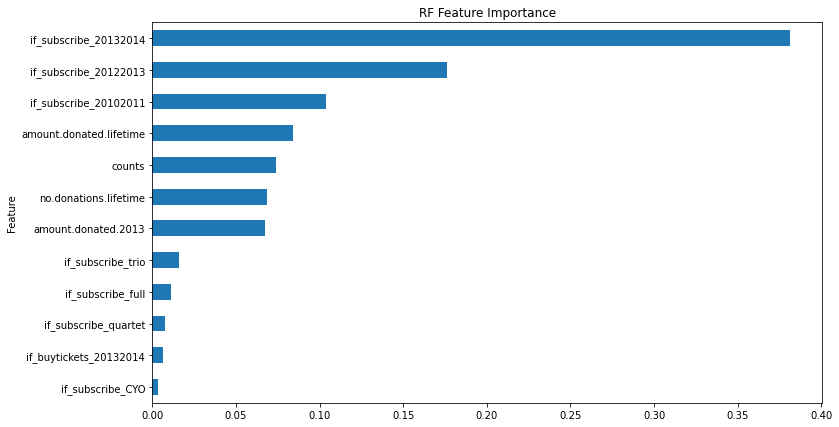

In [197]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train2,y_train2)
top_feats = 13
ranking = calc_feature_importances(rf_model,X_train2.columns,top_feats)

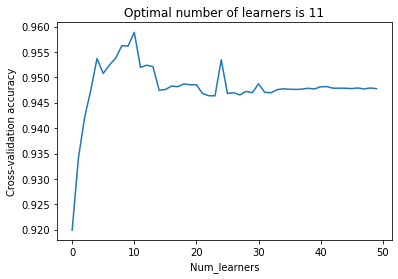

In [198]:
learners_range = range(1,51)
scores = []
for num in learners_range:
    boosting_model = AdaBoostClassifier(n_estimators=num,random_state=0)
    score = cross_val_score(boosting_model,X_train2,y_train2,scoring='roc_auc',cv=3)
    scores.append(np.mean(score))
    
idx = np.argmax(scores)
opt_learners = learners_range[idx]

plt.plot(scores)
plt.xlabel('Num_learners')
plt.ylabel('Cross-validation accuracy')
plt.title('Optimal number of learners is {}'.format(opt_learners))
plt.show()

In [200]:
opt_boosting_model = AdaBoostClassifier(n_estimators=opt_learners,random_state=0)
cv_scores = cross_val_score(opt_boosting_model,X_train2,y_train2,scoring='roc_auc',cv=3)
cv_acc = np.mean(cv_scores)
cv_acc

0.9588622605190923

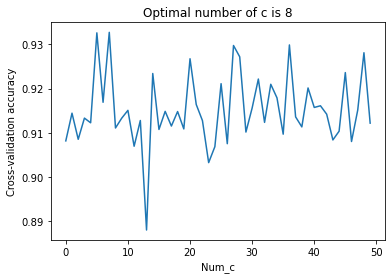

In [201]:
c_range = range(1,51)
scores = []
for num in c_range:
    Logistic_model = LogisticRegression(penalty = 'l2', C = num,random_state = 0)
    score = cross_val_score(Logistic_model,X_train2,y_train2,scoring='roc_auc',cv=3)
    scores.append(np.mean(score))
    
idx = np.argmax(scores)
opt_c = c_range[idx]

plt.plot(scores)
plt.xlabel('Num_c')
plt.ylabel('Cross-validation accuracy')
plt.title('Optimal number of c is {}'.format(opt_c))
plt.show()


In [202]:
opt_Logistic_model = LogisticRegression(penalty = 'l2', C = opt_c,random_state = 0)
cv_scores = cross_val_score(opt_Logistic_model,X_train2,y_train2,scoring='roc_auc',cv=3)
cv_acc = np.mean(cv_scores)
cv_acc

0.9327404654685635

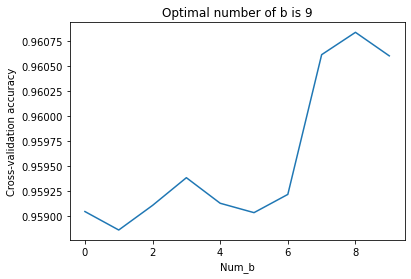

In [222]:
b = range(1,11)
scores = []
for num in b:
    ensemble_model = VotingClassifier(estimators=[('rf',rf_model),
                                             ('ada',opt_boosting_model)],
                                 voting='soft',
                                 weights = [1,num])
    score = cross_val_score(ensemble_model,X_train2,y_train2,scoring='roc_auc',cv=3)
    scores.append(np.mean(score))
    
idx = np.argmax(scores)
opt_b = b[idx]
plt.plot(scores)
plt.xlabel('Num_b')
plt.ylabel('Cross-validation accuracy')
plt.title('Optimal number of b is {}'.format(opt_b))
plt.show()

In [234]:
ensemble_model = VotingClassifier(estimators=[('rf',rf_model),
                                             ('ada',opt_boosting_model)],
                                 voting='soft',
                                 weights = [1,9])

ensemble_model.fit(X_train2,y_train2)
cv_scores = cross_val_score(ensemble_model,X_train2,y_train2,scoring='roc_auc',cv=3)
cv_acc = np.mean(cv_scores)
cv_acc

0.9605089924654155

In [232]:
preds_test = ensemble_model.predict_proba(X_test2)
outputs = np.array([])
for x in preds_test:
    a = x[1]
    outputs = np.append(outputs,a)


output = test.copy()
output['Predicted'] = outputs
display(output.head())

output.to_csv('output.csv', index=False)

,ID,Predicted
0,001i000000NuQ6Y,0.377484
1,001i000000NuQXz,0.363144
2,001i000000NuRDC,0.355794
3,001i000000NuQeg,0.355794
4,001i000000NuOQc,0.357239
